# Données fictives - modèles

## Modèle linéaire bayésien

          x1         x2  z  wastecents
0  54.967142  22.923146  1   38.131563
1  48.617357  27.896773  1   35.268422
2  56.476885  28.286427  0   23.751032
3  65.230299  25.988614  1   38.146059
4  47.658466  29.193571  0   22.696435


Output()


Résumé des résultats avec les colonnes et les statistiques détaillées :
                   mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept        14.515  4.050   6.775   21.993      0.046    0.036    7603.0   
coefficients[0]   0.474  0.051   0.378    0.571      0.001    0.000   10486.0   
coefficients[1]  -0.401  0.096  -0.585   -0.226      0.001    0.001    9360.0   
coefficients[2]   5.110  0.961   3.341    6.961      0.008    0.008   13678.0   
sigma             4.770  0.355   4.130    5.445      0.003    0.003   13630.0   

                 ess_tail  r_hat  
Intercept          8414.0    1.0  
coefficients[0]    9579.0    1.0  
coefficients[1]   10710.0    1.0  
coefficients[2]   10061.0    1.0  
sigma              9609.0    1.0  

Résumé avec les noms des variables explicatives :
    variable    mean     sd  hdi_3%  hdi_97%  r_hat
0  Intercept  14.515  4.050   6.775   21.993    1.0
1         x1   0.474  0.051   0.378    0.571    1.0
2         x2  -0.401  0

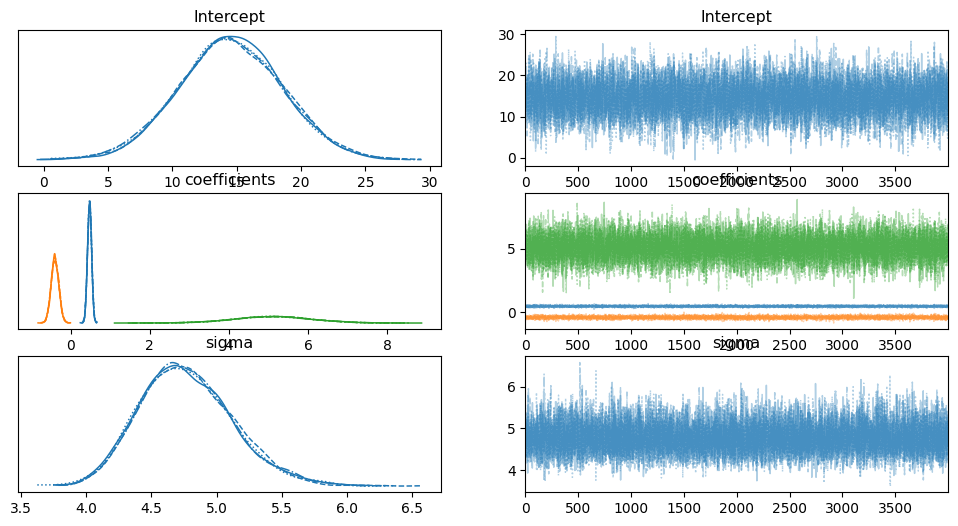


R-hat pour vérifier la convergence :
 <xarray.Dataset> Size: 64B
Dimensions:             (coefficients_dim_0: 3)
Coordinates:
  * coefficients_dim_0  (coefficients_dim_0) int64 24B 0 1 2
Data variables:
    Intercept           float64 8B 1.0
    coefficients        (coefficients_dim_0) float64 24B 1.0 1.0 1.0
    sigma               float64 8B 1.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import numpy as np

# Définir la taille de l'échantillon
n = 100

# Génération des variables explicatives (predictors)
np.random.seed(42)
x1 = np.random.normal(50, 10, n)  # Prédicteur 1 (ex: score initial)
x2 = np.random.normal(30, 5, n)   # Prédicteur 2 (ex: motivation)
z = np.random.choice([0, 1], size=n)  # Variable de traitement (0 = contrôle, 1 = traité)

# Définition des vrais effets
true_intercept = 10
true_coefficients = [0.5, -0.3, 5]  # Effets de x1, x2 et z respectivement
sigma_noise = 5  # Variabilité aléatoire

# Génération de la variable cible (wastecents)
wastecents = (
    true_intercept
    + true_coefficients[0] * x1
    + true_coefficients[1] * x2
    + true_coefficients[2] * z
    + np.random.normal(0, sigma_noise, n)  # Ajout du bruit
)

# Création du DataFrame factice
df_fake = pd.DataFrame({'x1': x1, 'x2': x2, 'z': z, 'wastecents': wastecents})

# Afficher un aperçu des données
print(df_fake.head())

# Définir les prédicteurs utilisés dans le modèle
predictors = ['x1', 'x2', 'z']

# Construire le modèle bayésien
with pm.Model() as model:
    # Priors vagues pour les coefficients
    intercept = pm.Normal('Intercept', mu=0, sigma=10)
    coefficients = pm.Normal('coefficients', mu=0, sigma=10, shape=len(predictors))

    # Lien linéaire
    X = df_fake[predictors].values  # Convertir les prédicteurs en NumPy array
    mu = intercept + pm.math.dot(X, coefficients)

    # Likelihood
    sigma = pm.HalfNormal('sigma', sigma=10)
    wastecents_obs = pm.Normal('wastecents_obs', mu=mu, sigma=sigma, observed=df_fake['wastecents'])

    # Échantillonnage
    trace = pm.sample(4000, tune=1000, cores=4, return_inferencedata=True)

# Résumé des résultats
summary = pm.summary(trace)
print("\nRésumé des résultats avec les colonnes et les statistiques détaillées :")
print(summary)

# Réinitialiser l'index du résumé pour manipuler les noms
summary = summary.reset_index()
predictors_with_intercept = ['Intercept'] + predictors

# Ajouter une colonne 'variable' avec les noms appropriés
def assign_variable_name(x):
    if x == 'Intercept':
        return 'Intercept'
    elif 'coefficients' in x:
        index = int(x.split('[')[-1].split(']')[0])  # Extraire l'index du coefficient
        return predictors_with_intercept[index + 1]  # +1 pour ajuster avec l'Intercept
    else:
        return x

summary['variable'] = summary['index'].apply(assign_variable_name)

# Afficher le résumé avec les noms des variables explicatives
print("\nRésumé avec les noms des variables explicatives :")
print(summary[['variable', 'mean', 'sd', 'hdi_3%', 'hdi_97%', 'r_hat']])

# Tracer les distributions postérieures
pm.plot_trace(trace)
plt.show()

# Vérifier la convergence avec R-hat
rhat = pm.rhat(trace)
print("\nR-hat pour vérifier la convergence :\n", rhat)


## Modèle poisson bayésien

          x1         x2  z  wastecents
0  54.967142  22.923146  1   38.131563
1  48.617357  27.896773  1   35.268422
2  56.476885  28.286427  0   23.751032
3  65.230299  25.988614  1   38.146059
4  47.658466  29.193571  0   22.696435


Output()


Résumé des résultats avec les colonnes et les statistiques détaillées :
                  mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept        2.930  0.176   2.608    3.262      0.002    0.002    6244.0   
coefficients[0]  0.016  0.002   0.012    0.020      0.000    0.000    7815.0   
coefficients[1] -0.017  0.004  -0.025   -0.009      0.000    0.000    7860.0   
coefficients[2]  0.175  0.039   0.102    0.251      0.000    0.000   10767.0   

                 ess_tail  r_hat  
Intercept          7246.0    1.0  
coefficients[0]    8386.0    1.0  
coefficients[1]    7895.0    1.0  
coefficients[2]    9293.0    1.0  

Résumé avec les noms des variables explicatives :
    variable   mean     sd  hdi_3%  hdi_97%  r_hat
0  Intercept  2.930  0.176   2.608    3.262    1.0
1         x1  0.016  0.002   0.012    0.020    1.0
2         x2 -0.017  0.004  -0.025   -0.009    1.0
3          z  0.175  0.039   0.102    0.251    1.0


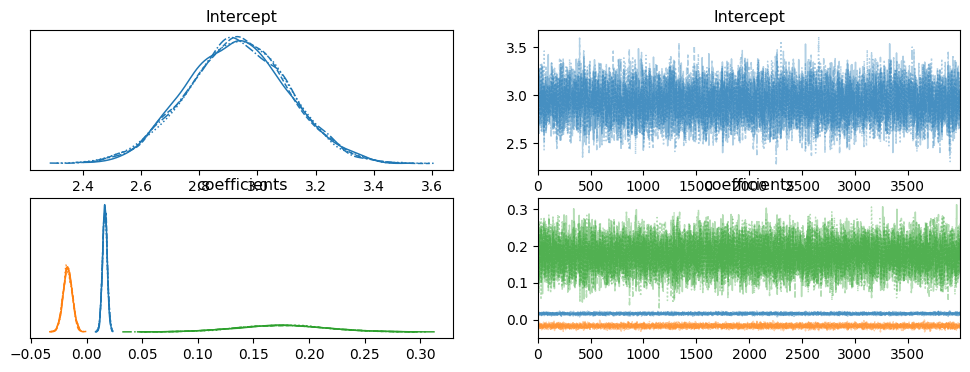


R-hat pour vérifier la convergence :
 <xarray.Dataset> Size: 56B
Dimensions:             (coefficients_dim_0: 3)
Coordinates:
  * coefficients_dim_0  (coefficients_dim_0) int64 24B 0 1 2
Data variables:
    Intercept           float64 8B 1.0
    coefficients        (coefficients_dim_0) float64 24B 1.0 1.0 1.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import numpy as np

# Définir la taille de l'échantillon
n = 100

# Génération des variables explicatives (predictors)
np.random.seed(42)
x1 = np.random.normal(50, 10, n)  # Prédicteur 1 (ex: score initial)
x2 = np.random.normal(30, 5, n)   # Prédicteur 2 (ex: motivation)
z = np.random.choice([0, 1], size=n)  # Variable de traitement (0 = contrôle, 1 = traité)

# Définition des vrais effets
true_intercept = 10
true_coefficients = [0.5, -0.3, 5]  # Effets de x1, x2 et z respectivement
sigma_noise = 5  # Variabilité aléatoire

# Génération de la variable cible (wastecents)
wastecents = (
    true_intercept
    + true_coefficients[0] * x1
    + true_coefficients[1] * x2
    + true_coefficients[2] * z
    + np.random.normal(0, sigma_noise, n)  # Ajout du bruit
)

# Création du DataFrame factice
df_fake = pd.DataFrame({'x1': x1, 'x2': x2, 'z': z, 'wastecents': wastecents})

# Afficher un aperçu des données
print(df_fake.head())

# Définir les prédicteurs utilisés dans le modèle
predictors = ['x1', 'x2', 'z']

# Construire le modèle bayésien de Poisson
with pm.Model() as model:
    # Prior vague pour les coefficients
    intercept = pm.Normal('Intercept', mu=0, sigma=10)
    coefficients = pm.Normal('coefficients', mu=0, sigma=10, shape=len(predictors))

    # Lien log-linéaire (fonction de lien de Poisson)
    X = df_fake[predictors].values  # Convertir les prédicteurs en NumPy array
    log_lambda = intercept + pm.math.dot(X, coefficients)  # Fonction de lien log-linéaire

    # Likelihood - Distribution de Poisson
    wastecents_obs = pm.Poisson('wastecents_obs', mu=pm.math.exp(log_lambda), observed=df_fake['wastecents'])

    # Échantillonnage avec la méthode NUTS
    trace = pm.sample(4000, tune=1000, cores=4, return_inferencedata=True)

# Résumé des résultats
summary = pm.summary(trace)
print("\nRésumé des résultats avec les colonnes et les statistiques détaillées :")
print(summary)

# Réinitialiser l'index du résumé pour pouvoir manipuler les noms
summary = summary.reset_index()

# Ajouter une colonne 'variable' avec les noms appropriés
def assign_variable_name(x):
    if x == 'Intercept':
        return 'Intercept'
    elif 'coefficients' in x:
        # Extraire le numéro du coefficient et le mapper avec les prédicteurs
        index = int(x.split('[')[-1].split(']')[0])  # Extraire l'index du coefficient
        return predictors[index]  # Pas besoin de +1 ici puisque les prédicteurs sont déjà indexés correctement
    else:
        return x

# Appliquer cette fonction pour assigner les noms des variables
summary['variable'] = summary['index'].apply(assign_variable_name)

# Afficher le résumé avec les noms des variables explicatives
print("\nRésumé avec les noms des variables explicatives :")
print(summary[['variable', 'mean', 'sd', 'hdi_3%', 'hdi_97%', 'r_hat']])

# Tracer les distributions postérieures
pm.plot_trace(trace)
plt.show()

# Vérifier la convergence avec R-hat
rhat = pm.rhat(trace)
print("\nR-hat pour vérifier la convergence :\n", rhat)


# Données réelles

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import numpy as np

# Charger le fichier CSV avec un encodage spécifique
df = pd.read_csv("Q14 survey_for dataverse.csv", encoding="ISO-8859-1")

# Vérifier les premières lignes
print(df.head())

# Sélectionner les colonnes numériques
df_numeric = df.select_dtypes(include=['number']).copy()

# Remplacer les valeurs manquantes par la médiane des colonnes numériques
df_numeric = df_numeric.apply(lambda col: col.fillna(col.median()) if pd.api.types.is_numeric_dtype(col) else col)

# Vérification des valeurs manquantes après imputation
print("Valeurs manquantes après imputation :\n", df_numeric.isnull().sum())

# Sélectionner les variables explicatives (exclure 'wastecents' ou toute autre variable dépendante)
predictors = df_numeric.drop(columns=['wastecents']).columns.tolist()

# Vérification des types de données des prédicteurs
print("Types de données des prédicteurs :\n", df_numeric[predictors].dtypes)



   statename  gender  educ  partyid  \
0  Wisconsin       2   2.0      4.0   
1     Kansas       2   5.0      4.0   
2       Ohio       2   2.0      2.0   
3      Texas       1   5.0      5.0   
4   New York       2   2.0      NaN   

                                        firstthought  taxpayer  percenttp  \
0                   Paying money to to the goverment         1       50.0   
1  fees that you pay to government for their use ...         1       71.0   
2   An expense people in the U.S. are forced to pay.         1      100.0   
3  Internal revenue services in receiving my in F...         1       39.0   
4  money that comes out of your income to cover c...         1       60.0   

                                              recent  \
0  Two days ago when purchasing items from a store.    
1          gas tax when I filled up my car yesterday   
2       Yesterday when making a purchase at a store.   
3    It was 8 years ago that I last pay income tax..   
4                 sale

# Données réelles - modèles


## Régression linéaire

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import numpy as np


# Construire le modèle bayésien
with pm.Model() as model:
    # Prior vague pour les coefficients
    intercept = pm.Normal('Intercept', mu=0, sigma=10)
    coefficients = pm.Normal('coefficients', mu=0, sigma=10, shape=len(predictors))

    # Lien linéaire
    X = df_numeric[predictors].values  # Convertir les prédicteurs en NumPy array
    mu = intercept + pm.math.dot(X, coefficients)

    # Likelihood
    sigma = pm.HalfNormal('sigma', sigma=10)
    wastecents_obs = pm.Normal('wastecents_obs', mu=mu, sigma=sigma, observed=df_numeric['wastecents'])

    # Échantillonnage
    trace = pm.sample(4000, tune=1000, cores=4, return_inferencedata=True)

# Résumé des résultats
summary = pm.summary(trace)
print("\nRésumé des résultats avec les colonnes et les statistiques détaillées :")
print(summary)

# Réinitialiser l'index du résumé pour pouvoir manipuler les noms
summary = summary.reset_index()
predictors_with_intercept = ['Intercept'] + predictors


# Ajouter une colonne 'variable' avec les noms appropriés
def assign_variable_name(x):
    if x == 'Intercept':
        return 'Intercept'
    elif 'coefficients' in x:
        # Extraire le numéro du coefficient et le mapper avec les prédicteurs
        index = int(x.split('[')[-1].split(']')[0])  # Extraire l'index du coefficient
        return predictors_with_intercept[index + 1]  # +1 pour ajuster avec l'Intercept
    else:
        # Pour d'autres termes comme 'sigma', on les laisse tels quels
        return x

# Appliquer cette fonction pour assigner les noms des variables
summary['variable'] = summary['index'].apply(assign_variable_name)

# Afficher le résumé avec les noms des variables explicatives
print("\nRésumé avec les noms des variables explicatives :")
print(summary[['variable', 'mean', 'sd', 'hdi_3%', 'hdi_97%', 'r_hat']])


# Tracer les distributions postérieures
pm.plot_trace(trace)
plt.show()

# Vérifier la convergence avec R-hat
rhat = pm.rhat(trace)
print("\nR-hat pour vérifier la convergence :\n", rhat)


Output()

**Résumé des résultats clés :**

* Les variables avec des coefficients significatifs (dont les intervalles de crédibilité ne contiennent pas 0) sont des candidats pour avoir un effet réel sur la prédiction de wastecents.

* Les variables comme gender, educ, eitcself, taxpayer, wagesal, et child ont des effets statistiquement significatifs sur wastecents (en fonction de leurs intervalles de crédibilité).

* Les variables avec des coefficients proches de 0 ou ayant un grand écart-type peuvent ne pas avoir un effet important ou significatif sur le modèle.

## Régression poisson

In [ ]:

# Construire le modèle bayésien de Poisson
with pm.Model() as model:
    # Prior vague pour les coefficients
    intercept = pm.Normal('Intercept', mu=0, sigma=10)
    coefficients = pm.Normal('coefficients', mu=0, sigma=10, shape=len(predictors))

    # Lien log-linéaire (poisson link function)
    X = df_numeric[predictors].values  # Convertir les prédicteurs en NumPy array
    log_lambda = intercept + pm.math.dot(X, coefficients)  # Fonction de lien log-linéaire

    # Likelihood - Distribution de Poisson
    wastecents_obs = pm.Poisson('wastecents_obs', mu=pm.math.exp(log_lambda), observed=df_numeric['wastecents'])

    # Échantillonnage avec la méthode NUTS
    trace = pm.sample(4000, tune=1000, cores=4, return_inferencedata=True)

# Résumé des résultats
summary = pm.summary(trace)
print("\nRésumé des résultats avec les colonnes et les statistiques détaillées :")
print(summary)

# Réinitialiser l'index du résumé pour pouvoir manipuler les noms
summary = summary.reset_index()

# Ajouter une colonne 'variable' avec les noms appropriés
def assign_variable_name(x):
    if x == 'Intercept':
        return 'Intercept'
    elif 'coefficients' in x:
        # Extraire le numéro du coefficient et le mapper avec les prédicteurs
        index = int(x.split('[')[-1].split(']')[0])  # Extraire l'index du coefficient
        return predictors[index]  # Pas besoin de +1 ici puisque les prédicteurs sont déjà indexés correctement
    else:
        return x

# Appliquer cette fonction pour assigner les noms des variables
summary['variable'] = summary['index'].apply(assign_variable_name)

# Afficher le résumé avec les noms des variables explicatives
print("\nRésumé avec les noms des variables explicatives :")
print(summary[['variable', 'mean', 'sd', 'hdi_3%', 'hdi_97%', 'r_hat']])

# Tracer les distributions postérieures
pm.plot_trace(trace)
plt.show()

# Vérifier la convergence avec R-hat
rhat = pm.rhat(trace)
print("\nR-hat pour vérifier la convergence :\n", rhat)


## Comparaison modèles

In [ ]:
import pymc as pm
import arviz as az
import numpy as np

# Modèle linéaire avec log-vraisemblance calculée
with pm.Model() as linear_model:
    # Prior vague pour les coefficients
    intercept = pm.Normal('Intercept', mu=0, sigma=10)
    coefficients = pm.Normal('coefficients', mu=0, sigma=10, shape=len(predictors))

    # Lien linéaire
    X = df_numeric[predictors].values  # Convertir les prédicteurs en NumPy array
    mu = intercept + pm.math.dot(X, coefficients)

    # Likelihood
    sigma = pm.HalfNormal('sigma', sigma=10)
    wastecents_obs = pm.Normal('wastecents_obs', mu=mu, sigma=sigma, observed=df_numeric['wastecents'])

    # Échantillonnage
    trace_linear = pm.sample(4000, tune=1000, cores=4, return_inferencedata=True)

    # Calculer la log-vraisemblance
    log_likelihood_linear = pm.compute_log_likelihood(trace_linear)

    # Accéder au groupe log_likelihood pour obtenir les valeurs
log_likelihood_group = log_likelihood_linear['log_likelihood']

# Extraire la log-vraisemblance pour wastecents_obs
log_likelihood_values = log_likelihood_group['wastecents_obs'].values

# Calculer WAIC et LOO pour le modèle linéaire
WAIC_linear = az.waic(log_likelihood_linear)
LOO_linear = az.loo(log_likelihood_linear)

# Affichage des résultats de WAIC et LOO pour le modèle linéaire
# Affichage des résultats de WAIC et LOO pour le modèle linéaire
print(f"WAIC pour le modèle linéaire: {WAIC_linear}")
print(f"LOO pour le modèle linéaire: {LOO_linear}")




Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:1655: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


WAIC pour le modèle linéaire: Computed from 16000 posterior samples and 1000 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -4603.00    19.72
p_waic       30.01        -

There has been a warning during the calculation. Please check the results.
LOO pour le modèle linéaire: Computed from 16000 posterior samples and 1000 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -4603.07    19.72
p_loo       30.07        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)     1000  100.0%
   (0.70, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%



In [ ]:
import pymc as pm
import arviz as az
import numpy as np

# Modèle de Poisson avec log-vraisemblance calculée
with pm.Model() as poisson_model:
    # Prior vague pour les coefficients
    intercept = pm.Normal('Intercept', mu=0, sigma=10)
    coefficients = pm.Normal('coefficients', mu=0, sigma=10, shape=len(predictors))

    # Lien log-linéaire
    X = df_numeric[predictors].values  # Convertir les prédicteurs en NumPy array
    log_lambda = intercept + pm.math.dot(X, coefficients)  # Fonction de lien log-linéaire

    # Likelihood - Distribution de Poisson
    wastecents_obs = pm.Poisson('wastecents_obs', mu=pm.math.exp(log_lambda), observed=df_numeric['wastecents'])

    # Échantillonnage
    trace_poisson = pm.sample(4000, tune=1000, cores=4, return_inferencedata=True)

    # Calculer la log-vraisemblance
    log_likelihood_poisson = pm.compute_log_likelihood(trace_poisson)

    # Accéder au groupe log_likelihood pour obtenir les valeurs
log_likelihood_group_poisson = log_likelihood_poisson['log_likelihood']

# Extraire la log-vraisemblance pour wastecents_obs
log_likelihood_poisson_values = log_likelihood_group_poisson['wastecents_obs'].values

# Calculer WAIC et LOO pour le modèle de Poisson
WAIC_poisson = az.waic(log_likelihood_poisson)
LOO_poisson = az.loo(log_likelihood_poisson)

# Affichage des résultats de WAIC et LOO pour le modèle de Poisson
print(f"WAIC pour le modèle de Poisson: {WAIC_poisson}")
print(f"LOO pour le modèle de Poisson: {LOO_poisson}")


Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:1655: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:1045: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


WAIC pour le modèle de Poisson: Computed from 16000 posterior samples and 1000 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -8693.04   240.65
p_waic      356.44        -

There has been a warning during the calculation. Please check the results.
LOO pour le modèle de Poisson: Computed from 16000 posterior samples and 1000 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -9226.33   263.29
p_loo      889.73        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)      896   89.6%
   (0.70, 1]   (bad)        24    2.4%
   (1, Inf)   (very bad)   80    8.0%



In [ ]:
import pymc as pm
import arviz as az
import numpy as np

# Définition du modèle bayésien avec prior Laplace et vraisemblance normale
with pm.Model() as laplace_model:
    # Prior sur les coefficients
    beta = pm.Laplace("beta", mu=0, b=1, shape=X.shape[1])

    # Prior sur l'intercept
    intercept = pm.Normal("intercept", mu=0, sigma=1)

    # Fonction de lien linéaire
    mu = intercept + pm.math.dot(X, beta)

    # Prior sur l'écart-type (sigma) de la vraisemblance
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Likelihood - Distribution normale
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=wastecents)

    # Échantillonnage
    trace_laplace = pm.sample(4000, tune=1000, return_inferencedata=True, cores=2, target_accept=0.95)

# Calcul manuel de la log-vraisemblance
# Extraire les échantillons pour les paramètres
beta_samples = trace_laplace.posterior['beta'].values
intercept_samples = trace_laplace.posterior['intercept'].values
sigma_samples = trace_laplace.posterior['sigma'].values

# Calculer la log-vraisemblance pour chaque échantillon
log_likelihood_values = -0.5 * np.sum(
    np.log(2 * np.pi * sigma_samples**2) + ((wastecents - intercept_samples - np.dot(X, beta_samples.T))**2) / (sigma_samples**2),
    axis=1
)

# Calcul de WAIC et LOO
WAIC_laplace = az.waic(log_likelihood_values)
LOO_laplace = az.loo(log_likelihood_values)

# Affichage des résultats
print(f"WAIC pour le modèle avec prior Laplace: {WAIC_laplace}")
print(f"LOO pour le modèle avec prior Laplace: {LOO_laplace}")


NameError: name 'wastecents' is not defined

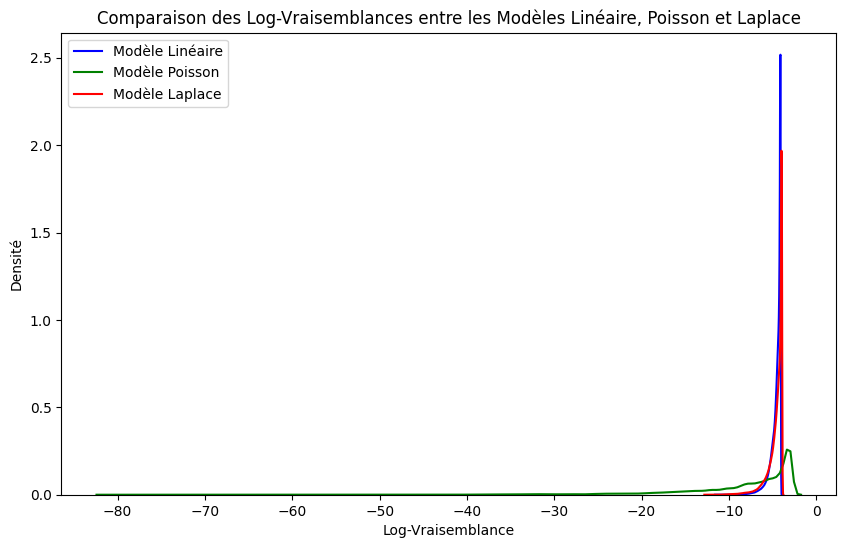

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extraire les log-vraisemblances des trois modèles
log_likelihood_linear_values = log_likelihood_group['wastecents_obs'].values
log_likelihood_poisson_values = log_likelihood_group_poisson['wastecents_obs'].values
log_likelihood_laplace_values = log_likelihood_group_laplace['y_obs'].values  # Changer 'wastecents_obs' en 'y_obs' pour Laplace

# Tracer les courbes de densité
plt.figure(figsize=(10, 6))
sns.kdeplot(log_likelihood_linear_values.flatten(), label='Modèle Linéaire', color='blue')
sns.kdeplot(log_likelihood_poisson_values.flatten(), label='Modèle Poisson', color='green')
sns.kdeplot(log_likelihood_laplace_values.flatten(), label='Modèle Laplace', color='red')

plt.title('Comparaison des Log-Vraisemblances entre les Modèles Linéaire, Poisson et Laplace')
plt.xlabel('Log-Vraisemblance')
plt.ylabel('Densité')
plt.legend()
plt.show()


## Autre evalu

/usr/local/lib/python3.11/dist-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (120) in plot_autocorr, generating only 40 plots
  warnings.warn(


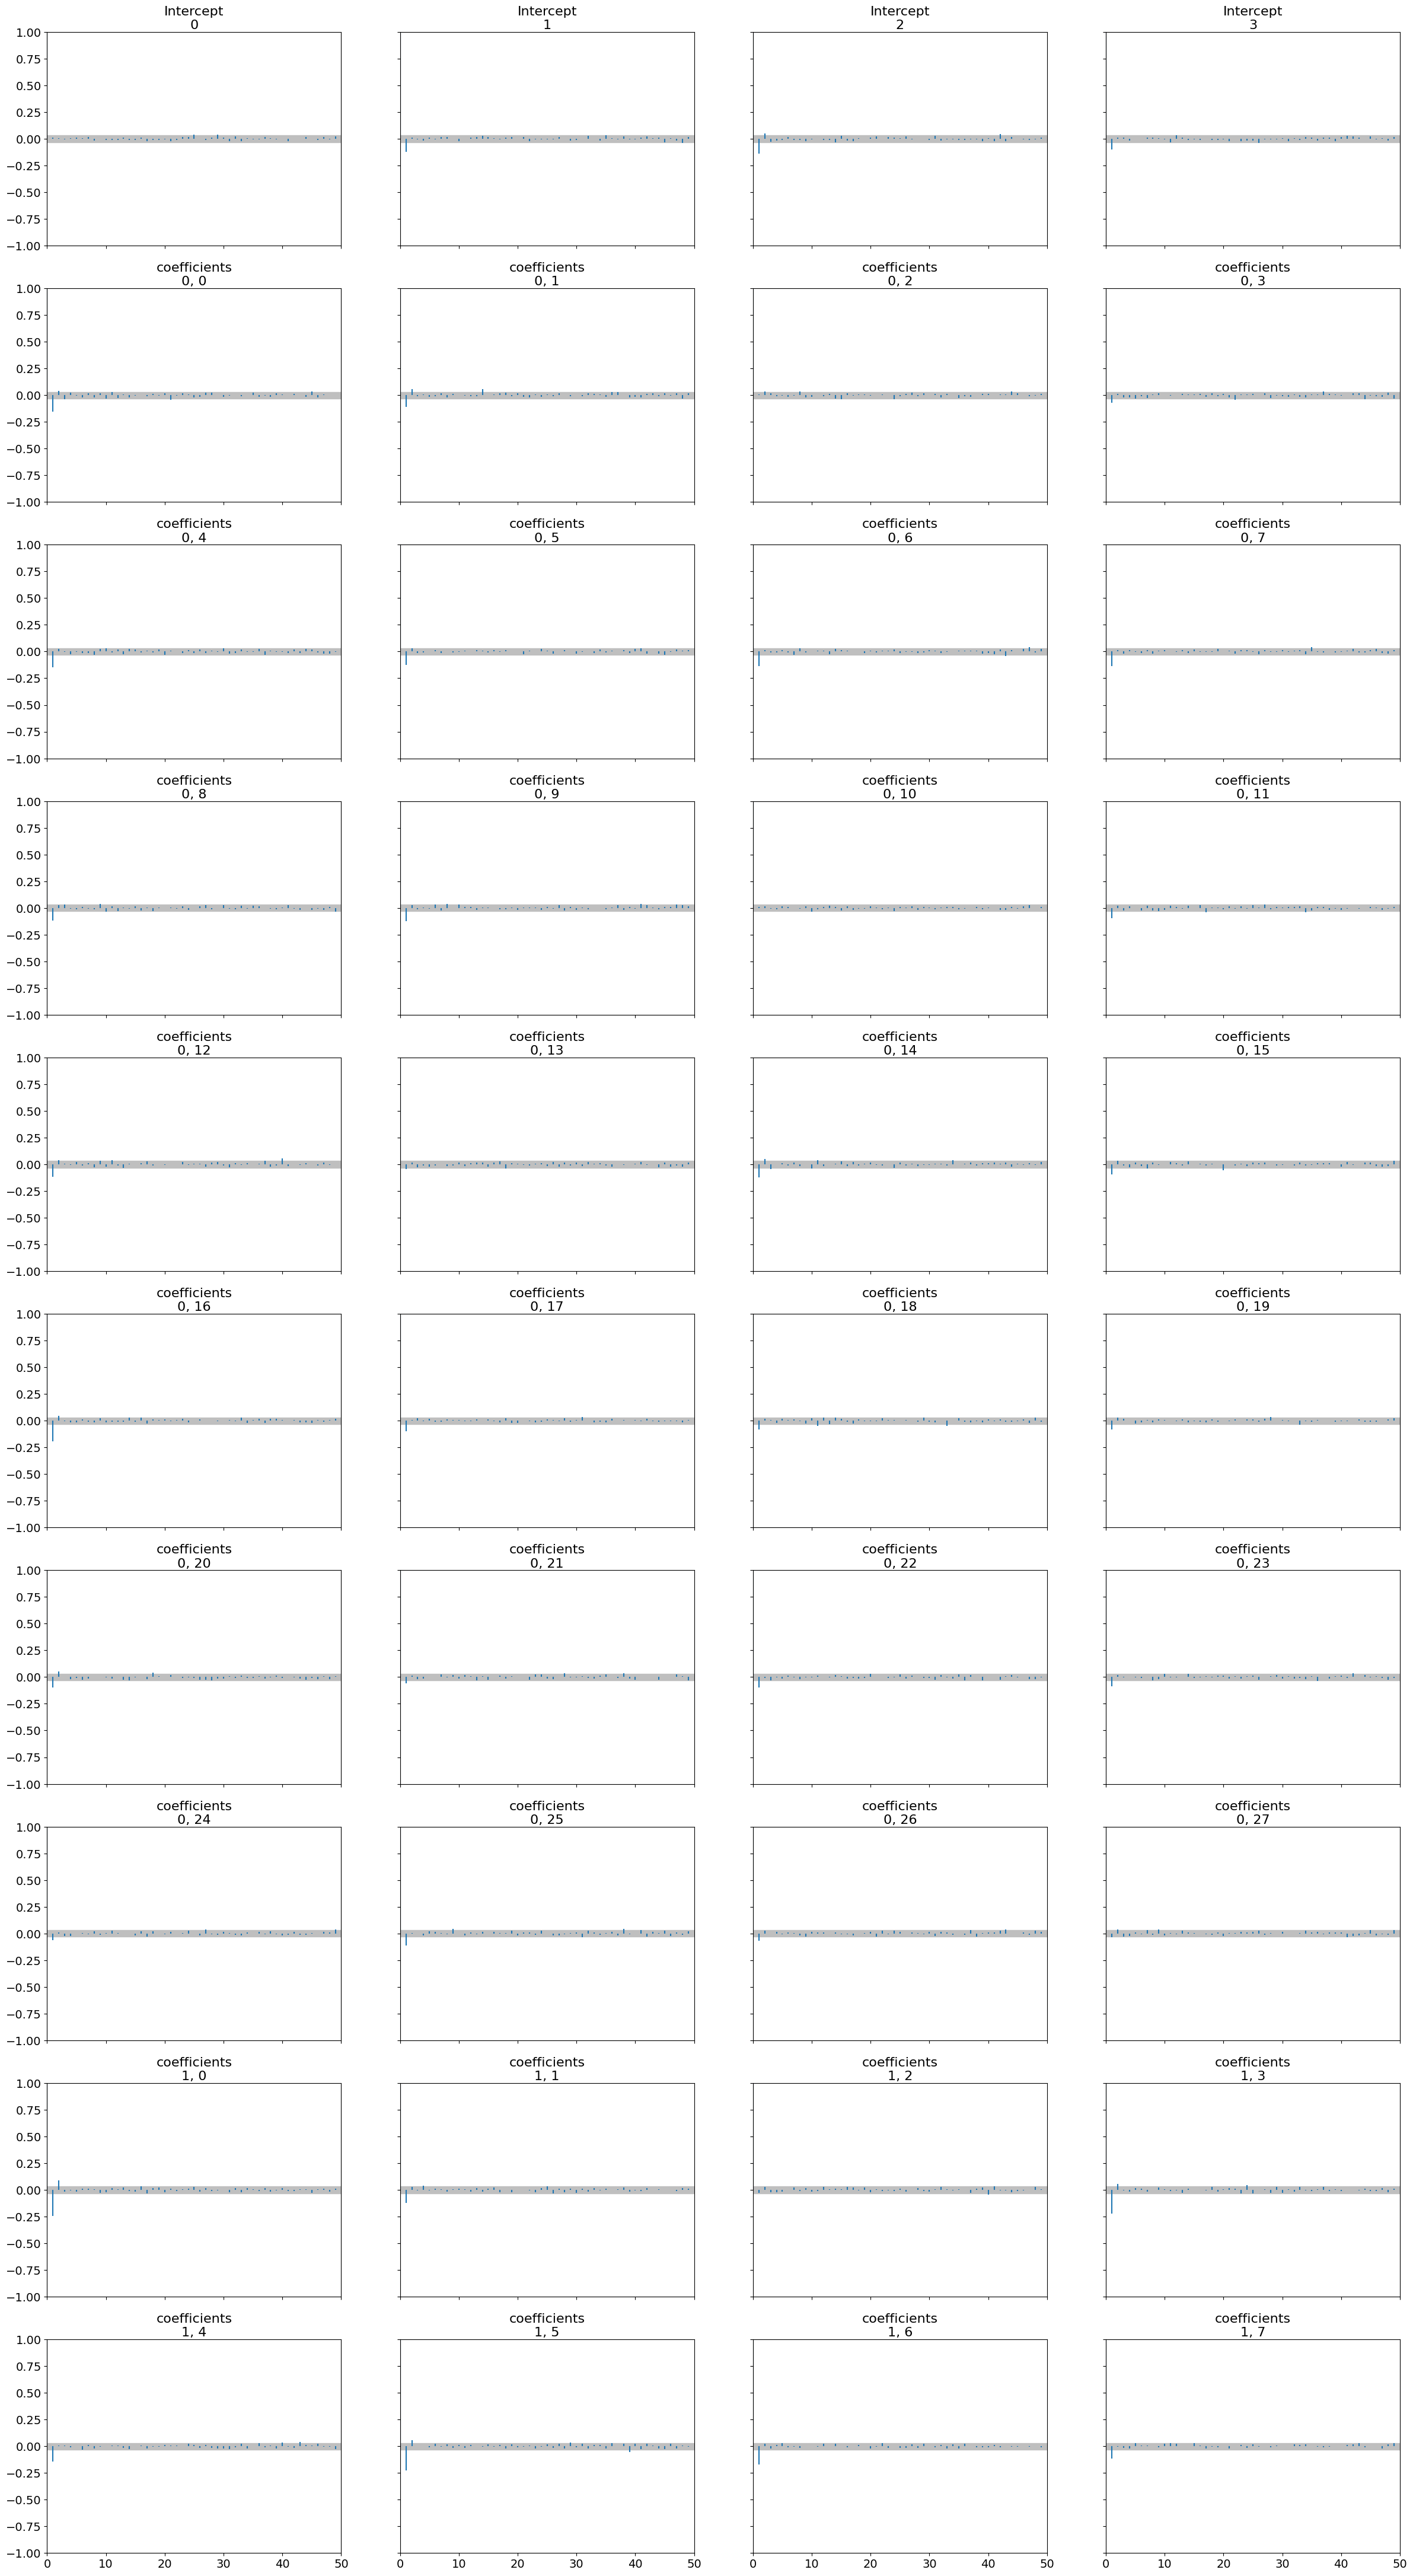

In [ ]:
# Tracer l'autocorrélation des chaînes avec un nombre limité de lags (par exemple, 50)
pm.plot_autocorr(trace, max_lag=50)
plt.show()




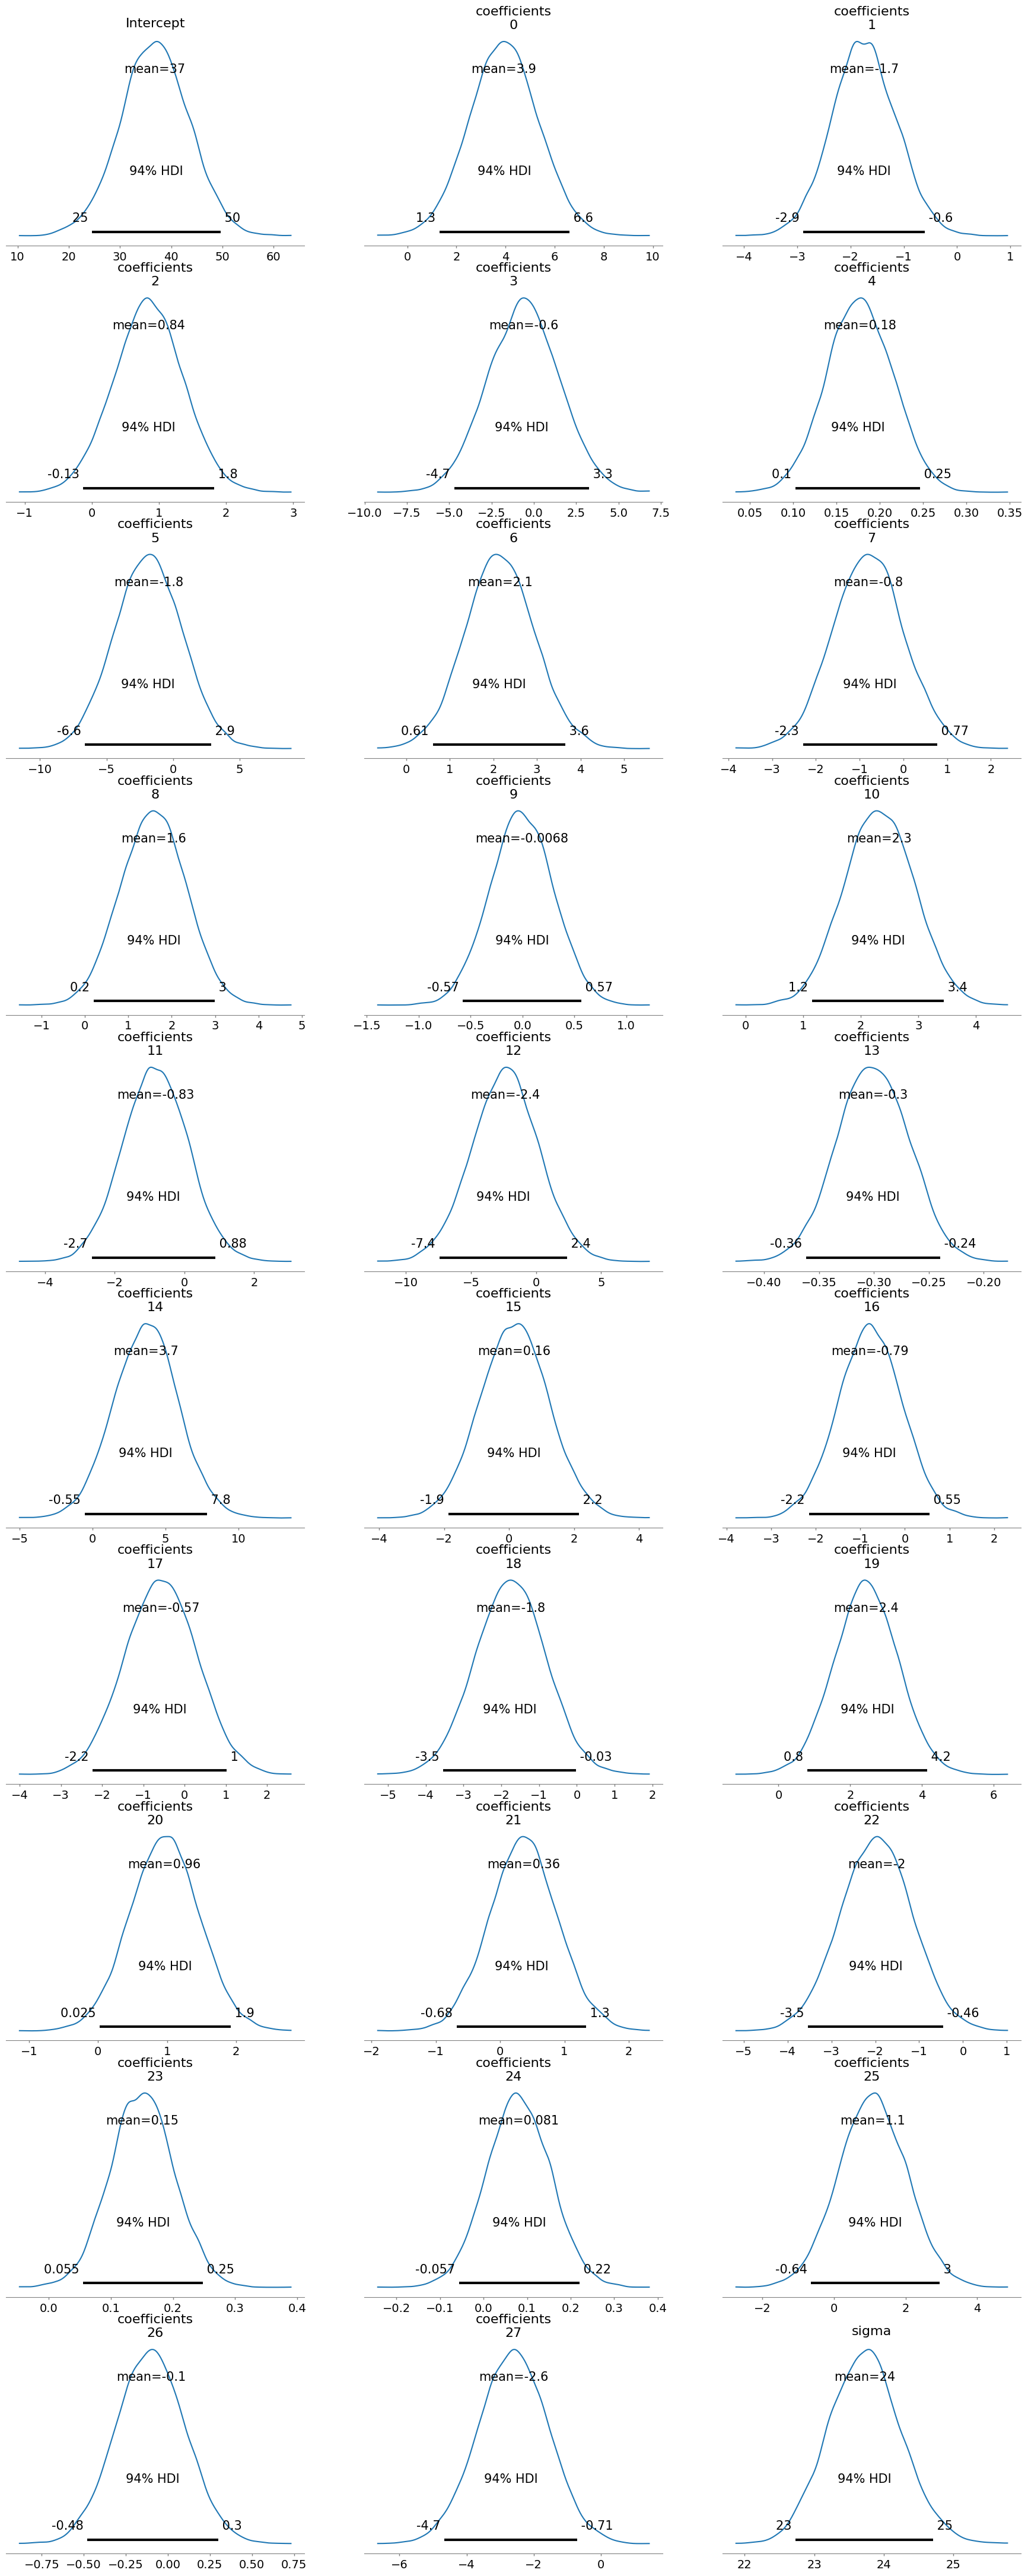

In [ ]:
# Tracer les distributions postérieures des paramètres
pm.plot_posterior(trace)
plt.show()


# Autre étude


Informations générales sur wastecents :
count    996.000000
mean      55.033133
std       26.584953
min        0.000000
25%       36.000000
50%       59.000000
75%       80.000000
max      100.000000
Name: wastecents, dtype: float64

Valeurs uniques dans wastecents :
[ 60.  25.  40.  19.  84.  97.  70.  82.  90.  98.   7.  59.  50.  49.
  99.  21.  41.  81.  18.  80.  33.   0.  64.  85.   6.  61.  58.   5.
  55. 100.  52.  77.  75.  42.  88.  86.  87.  83.  20.  29.  28.  92.
  95.  62.  91.  48.  15.  10.  63.  53.  73.  65.  69.  39.  31.  54.
  66.  71.  68.  38.  24.  79.  37.  45.  23.  93.  32.  35.  36.  30.
  34.  51.  22.  56.  89.  27.  11.  nan  44.   2.  72.  67.  14.  47.
   9.  96.  12.  57.   8.  74.  43.  16.  76.  46.   1.  17.  26.]

Type de données de wastecents :
float64

Valeurs manquantes dans wastecents :
4


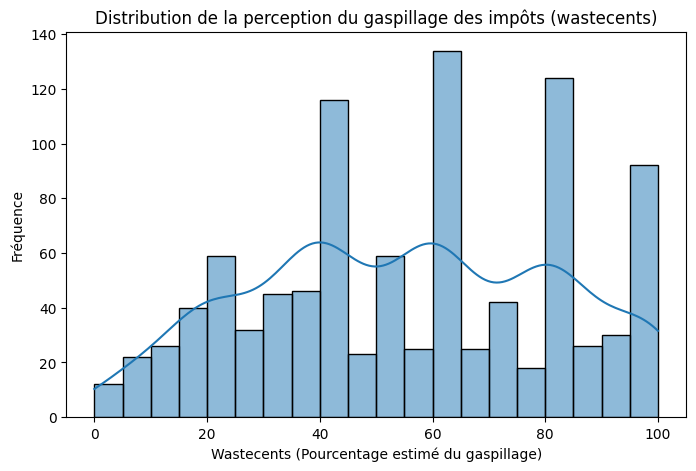

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier CSV
df = pd.read_csv("Q14 survey_for dataverse.csv", encoding="ISO-8859-1")



# Vérifier les informations générales sur la colonne "wastecents"
print("\nInformations générales sur wastecents :")
print(df['wastecents'].describe())

# Vérifier les valeurs uniques pour détecter d'éventuelles anomalies
print("\nValeurs uniques dans wastecents :")
print(df['wastecents'].unique())

# Vérifier le type des données
print("\nType de données de wastecents :")
print(df['wastecents'].dtype)

# Vérifier s'il y a des valeurs manquantes
print("\nValeurs manquantes dans wastecents :")
print(df['wastecents'].isna().sum())

# Histogramme de la variable wastecents
plt.figure(figsize=(8, 5))
sns.histplot(df['wastecents'].dropna(), bins=20, kde=True)
plt.xlabel("Wastecents (Pourcentage estimé du gaspillage)")
plt.ylabel("Fréquence")
plt.title("Distribution de la perception du gaspillage des impôts (wastecents)")
plt.show()


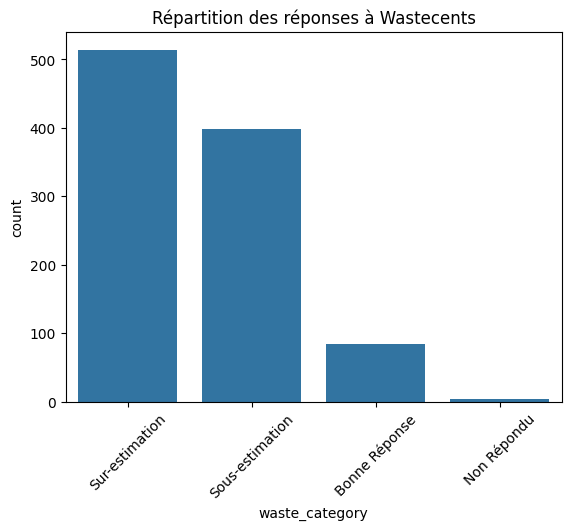

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Charger les données

# Nettoyer la colonne 'wastecents' et s'assurer qu'elle est numérique
df['wastecents'] = pd.to_numeric(df['wastecents'], errors='coerce')

# Définir les catégories
def categorize_wastecents(value):
    if pd.isna(value):
        return "Non Répondu"
    elif 45 <= value <= 55:
        return "Bonne Réponse"
    elif value < 45:
        return "Sous-estimation"
    else:
        return "Sur-estimation"

df['waste_category'] = df['wastecents'].apply(categorize_wastecents)

# Vérifier la distribution des catégories
sns.countplot(data=df, x="waste_category")
plt.title("Répartition des réponses à Wastecents")
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


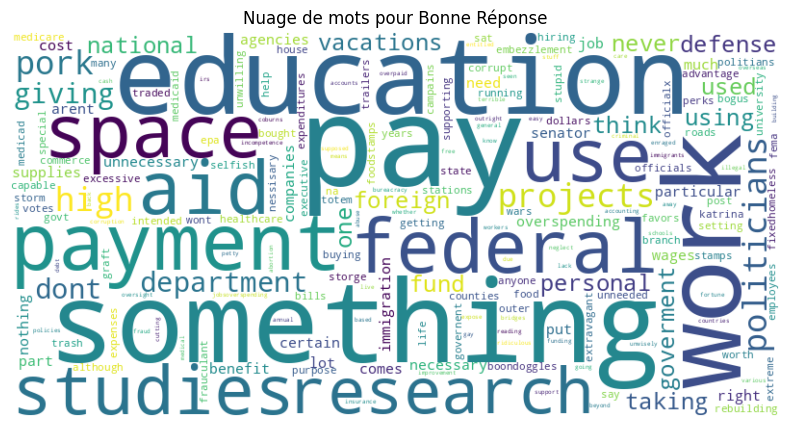

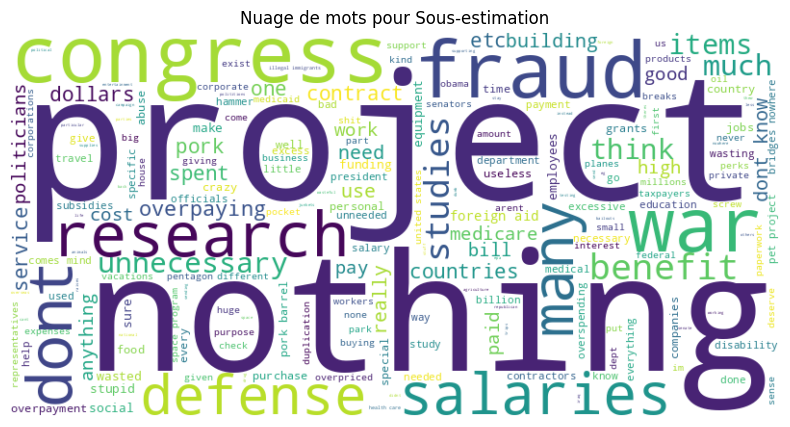

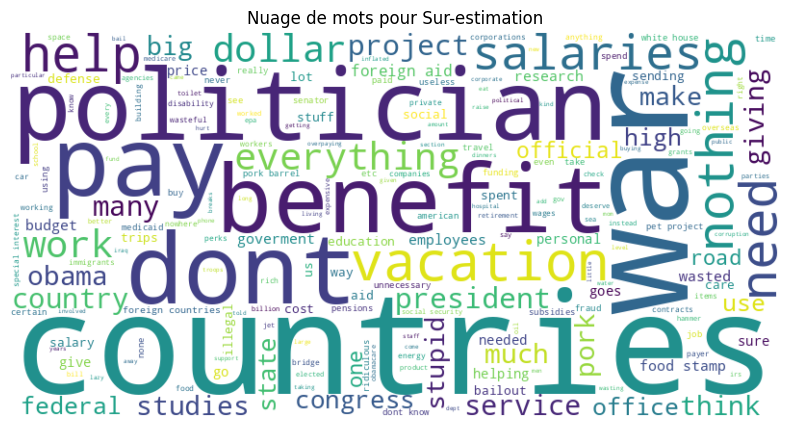

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Charger les stopwords en anglais
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')


stop_words = set(stopwords.words('english'))
custom_stopwords = {"government", "waste", "money", "tax", "taxes", "welfare", "spending", "paying", "thing", "people", "programs", "things", "military" }  # Ajouter des mots redondants
stop_words.update(custom_stopwords)

# Fonction de nettoyage du texte
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()  # Convertir en minuscule
    text = re.sub(r'[^\w\s]', '', text)  # Supprimer la ponctuation
    words = word_tokenize(text)  # Tokeniser (séparer les mots)
    words = [word for word in words if word not in stop_words]  # Supprimer stopwords
    return " ".join(words)

df['clean_wastethink'] = df['wastethink'].apply(clean_text)


# Séparer les nuages de mots selon les catégories
categories = ["Bonne Réponse", "Sous-estimation", "Sur-estimation"]
for category in categories:
    text_data = " ".join(df[df['waste_category'] == category]['clean_wastethink'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

    # Afficher le nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nuage de mots pour {category}")
    plt.show()
